In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
# Load the dataset
file_path = 'C:/Users/Owner/Downloads/Post Performance(HCHSA).xlsx'
post_performance = pd.read_excel(file_path)

# Display the first few rows of the dataframe
post_performance.head()

,Date,Month_Num,Year,Month_Text,Time,Day,Post ID,Network,Post Type,Content Type,...,Shares,Saves,Post Link Clicks,Other Post Clicks,Post Clicks (All),Other Engagements,Video Views,Story Taps Forward,Story Exits,Story Replies
0,2022-12-08 13:10:00,12,2022,December,13:10,Thu,171169320474_514481674044094,Facebook,Post,Photo,...,1.0,NaN,3.0,102.0,105.0,NaN,NaN,NaN,NaN,NaN
1,2022-12-08 15:05:00,12,2022,December,15:05,Thu,1600959658579075086,Twitter,Tweet,Link,...,0.0,NaN,8.0,6.0,14.0,0.0,NaN,NaN,NaN,NaN
2,2022-12-08 18:37:00,12,2022,December,18:37,Thu,171169320474_514626447362950,Facebook,Post,Photo,...,0.0,NaN,NaN,44.0,44.0,NaN,NaN,NaN,NaN,NaN
3,2022-12-08 18:44:00,12,2022,December,18:44,Thu,17925232292624964,Instagram,Post,Carousel,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2022-12-09 07:37:00,12,2022,December,07:37,Fri,1601209510361976834,Twitter,Tweet,Photo,...,2.0,NaN,1.0,16.0,17.0,0.0,NaN,NaN,NaN,NaN


In [17]:
# Assuming Post_Performance is your original DataFrame
post_performance_clean = post_performance.dropna(subset=['Likes']).copy()

# Now, when you modify post_performance_clean, it's clear you're modifying the copy
post_performance_clean['Date'] = pd.to_datetime(post_performance_clean['Date'])


In [18]:
# Creating 'Day' and 'Hour' columns for further analysis
post_performance_clean['Day'] = post_performance_clean['Date'].dt.day_name()
post_performance_clean['Hour'] = post_performance_clean['Date'].dt.hour

In [19]:
post_performance_clean.head()

,Date,Month_Num,Year,Month_Text,Time,Day,Post ID,Network,Post Type,Content Type,...,Saves,Post Link Clicks,Other Post Clicks,Post Clicks (All),Other Engagements,Video Views,Story Taps Forward,Story Exits,Story Replies,Hour
0,2022-12-08 13:10:00,12,2022,December,13:10,Thursday,171169320474_514481674044094,Facebook,Post,Photo,...,NaN,3.0,102.0,105.0,NaN,NaN,NaN,NaN,NaN,13
1,2022-12-08 15:05:00,12,2022,December,15:05,Thursday,1600959658579075086,Twitter,Tweet,Link,...,NaN,8.0,6.0,14.0,0.0,NaN,NaN,NaN,NaN,15
2,2022-12-08 18:37:00,12,2022,December,18:37,Thursday,171169320474_514626447362950,Facebook,Post,Photo,...,NaN,NaN,44.0,44.0,NaN,NaN,NaN,NaN,NaN,18
3,2022-12-08 18:44:00,12,2022,December,18:44,Thursday,17925232292624964,Instagram,Post,Carousel,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,18
4,2022-12-09 07:37:00,12,2022,December,07:37,Friday,1601209510361976834,Twitter,Tweet,Photo,...,NaN,1.0,16.0,17.0,0.0,NaN,NaN,NaN,NaN,7


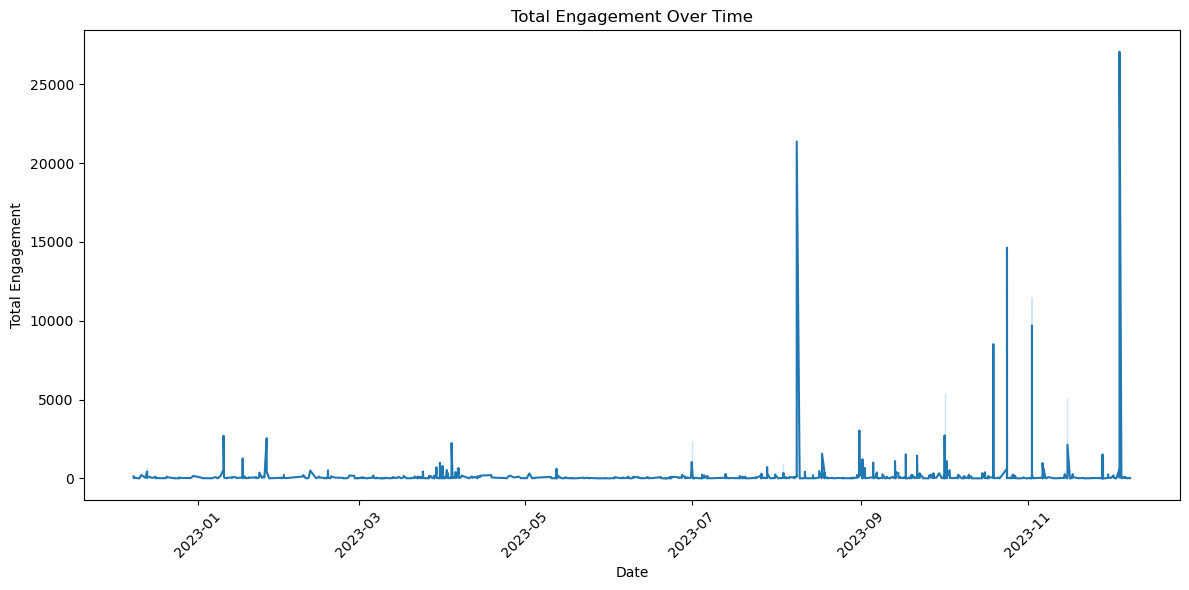

In [21]:
# 1. Engagements Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=post_performance_clean, x='Date', y='Engagements')
plt.title('Total Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/Owner/Downloads/engagements_over_time.png')

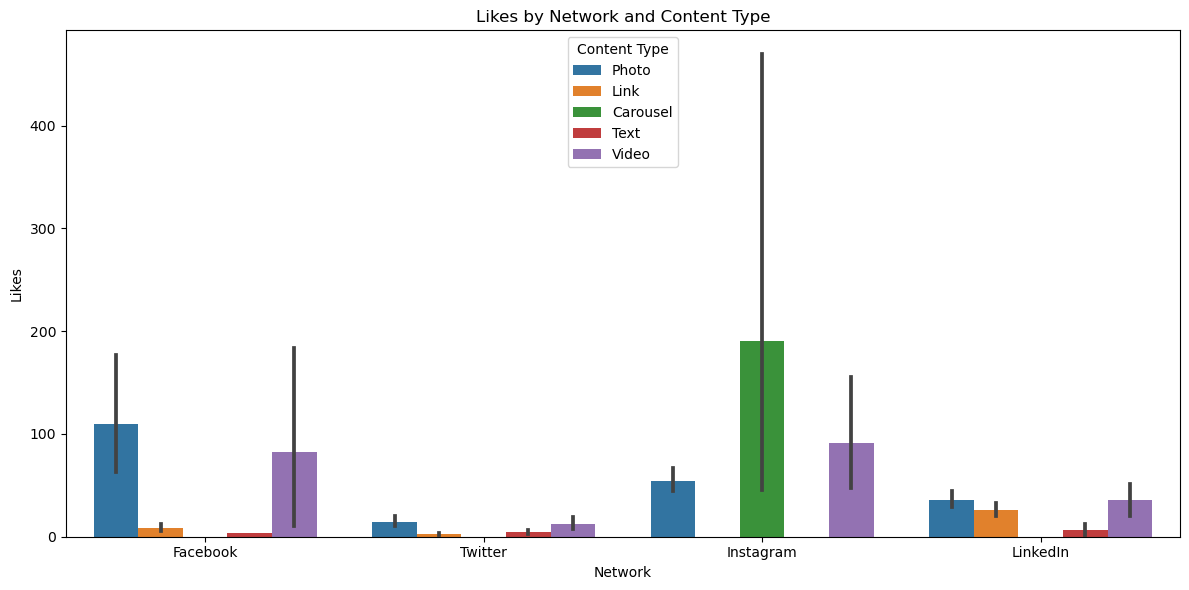

In [22]:
# 2. Likes by Network and Content Type
plt.figure(figsize=(12, 6))
sns.barplot(data=post_performance_clean, x='Network', y='Likes', hue='Content Type')
plt.title('Likes by Network and Content Type')
plt.xlabel('Network')
plt.ylabel('Likes')
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('/Users/Owner/Downloads/likes_by_network_content.png')

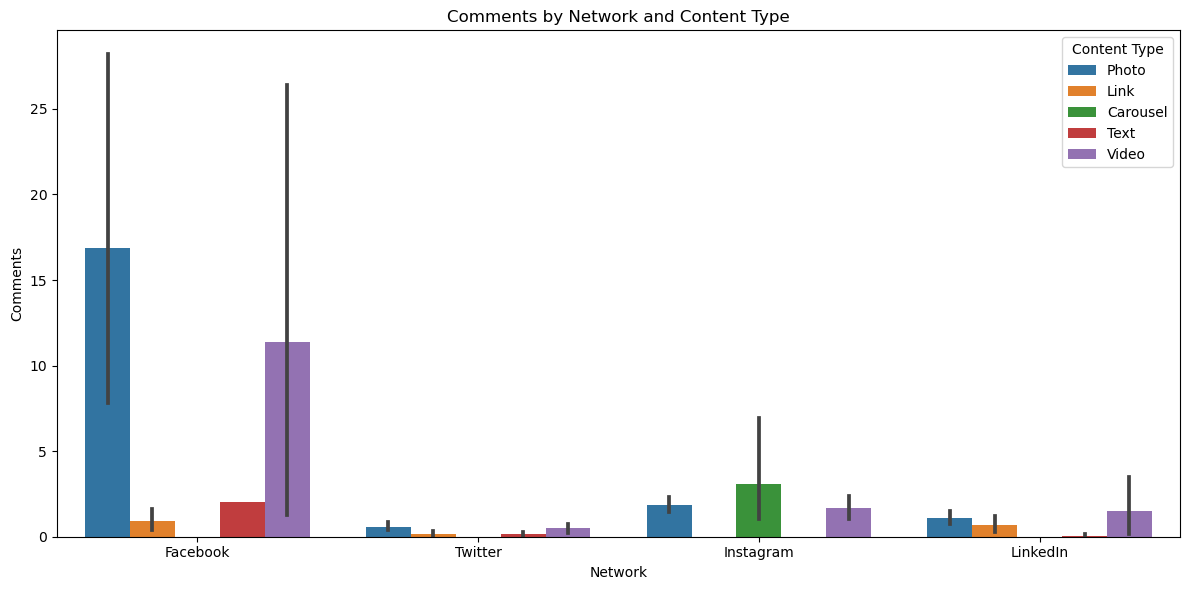

In [23]:
# 3. Comments by Network and Content Type
plt.figure(figsize=(12, 6))
sns.barplot(data=post_performance_clean, x='Network', y='Comments', hue='Content Type')
plt.title('Comments by Network and Content Type')
plt.xlabel('Network')
plt.ylabel('Comments')
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('/Users/Owner/Downloads/comments_by_network_content.png')

In [ ]:
# 4. Shares by Network and Content Type
plt.figure(figsize=(12, 6))
sns.barplot(data=post_performance_clean, x='Network', y='Shares', hue='Content Type')
plt.title('Shares by Network and Content Type')
plt.xlabel('Network')
plt.ylabel('Shares')
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('/Users/Owner/Downloads/shares_by_network_content.png')

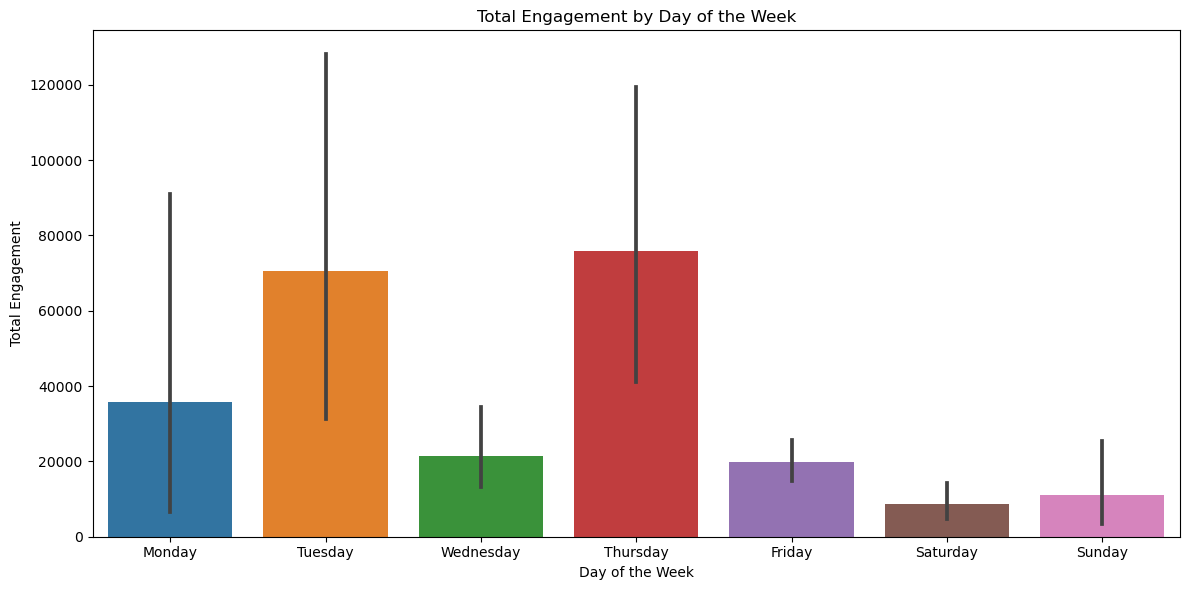

In [24]:
# 5. Total Engagement by Day of the Week
plt.figure(figsize=(12, 6))
sns.barplot(data=post_performance_clean, x='Day', y='Engagements', estimator=np.sum, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Engagement')
plt.tight_layout()
plt.savefig('/Users/Owner/Downloads/cengagement_by_day.png')

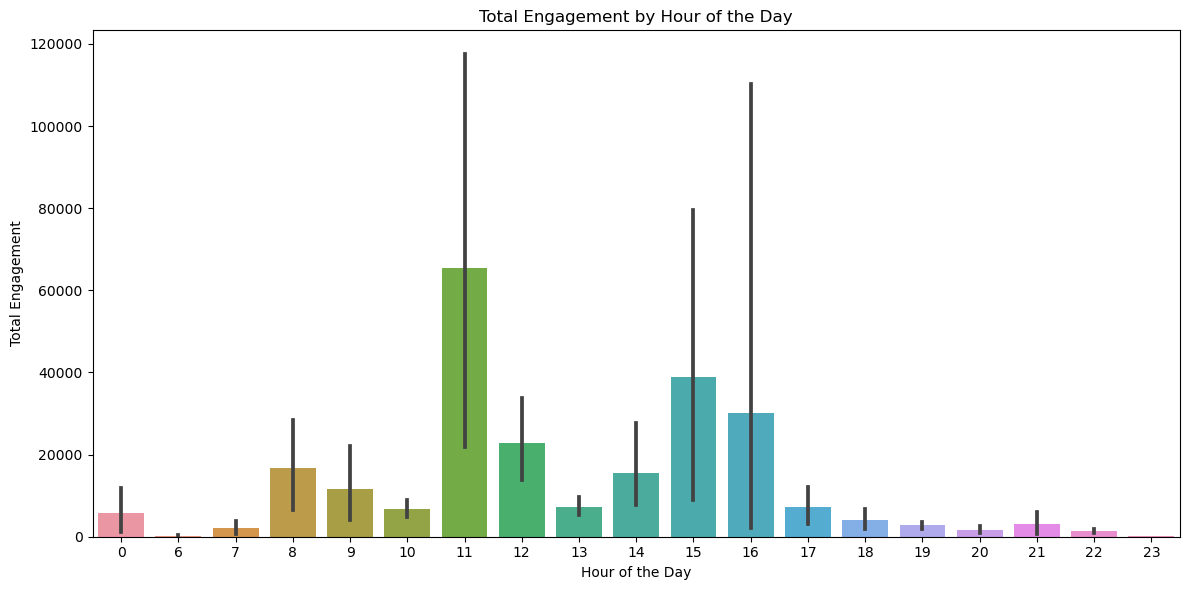

In [25]:
# 6. Total Engagement by Hour of the Day
post_performance_clean['Hour'] = post_performance_clean['Date'].dt.hour
plt.figure(figsize=(12, 6))
sns.barplot(data=post_performance_clean, x='Hour', y='Engagements', estimator=np.sum)
plt.title('Total Engagement by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Engagement')
plt.tight_layout()
plt.savefig('/Users/Owner/Downloads/cengagement_by_hour.png')

In [26]:
# 7. Aggregating total Impressions by day of the Week
day_impressions = post_performance_clean.groupby('Day')['Impressions'].sum().reset_index().sort_values(by='Impressions', ascending=False)

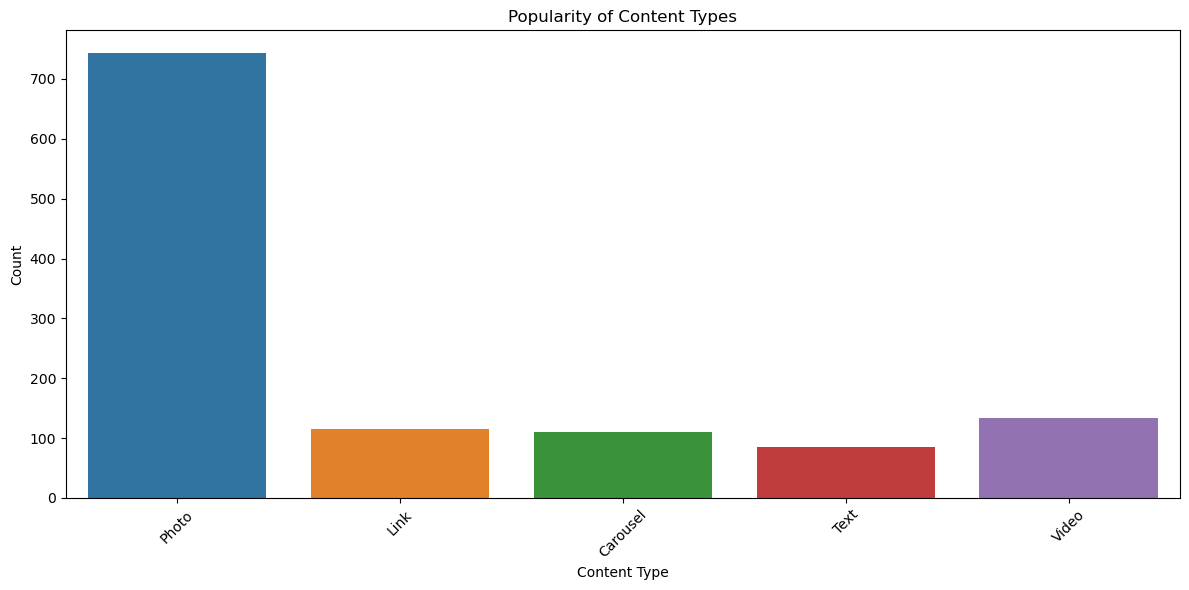

In [27]:
# 8. Popularity by Content Types
plt.figure(figsize=(12, 6))
sns.countplot(data=post_performance_clean, x='Content Type')
plt.title('Popularity of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/Users/Owner/Downloads/popularity_content_types.png')

In [28]:
# Prepare data for further analysis
viz_file_paths = {
    "Engagements Over Time": '/Users/Owner/Downloads/engagements_over_time.png',
    "Likes by Network and Content Type": '/Users/Owner/Downloads/likes_by_network_content.png',
    "Comments by Network and Content Type": '/Users/Owner/Downloads/comments_by_network_content.png',
    "Shares by Network and Content Type": '/Users/Owner/Downloads/shares_by_network_content.png',
    "Total Engagement by Day of the Week": '/Users/Owner/Downloads/engagement_by_day.png',
    "Total Engagement by Hour of the Day": '/Users/Owner/Downloads/engagement_by_hour.png',
    "Popularity of Content Types": '/Users/Owner/Downloads/popularity_content_types.png'
}

In [29]:
# Return the paths of the saved visualizations and day_impressions data for analysis
viz_file_paths, day_impressions

({'Engagements Over Time': '/Users/Owner/Downloads/engagements_over_time.png',
  'Likes by Network and Content Type': '/Users/Owner/Downloads/likes_by_network_content.png',
  'Comments by Network and Content Type': '/Users/Owner/Downloads/comments_by_network_content.png',
  'Shares by Network and Content Type': '/Users/Owner/Downloads/shares_by_network_content.png',
  'Total Engagement by Day of the Week': '/Users/Owner/Downloads/engagement_by_day.png',
  'Total Engagement by Hour of the Day': '/Users/Owner/Downloads/engagement_by_hour.png',
  'Popularity of Content Types': '/Users/Owner/Downloads/popularity_content_types.png'},
          Day  Impressions
 4   Thursday      1579670
 5    Tuesday      1444797
 1     Monday       961540
 6  Wednesday       662017
 0     Friday       344476
 3     Sunday       171669
 2   Saturday       159610)

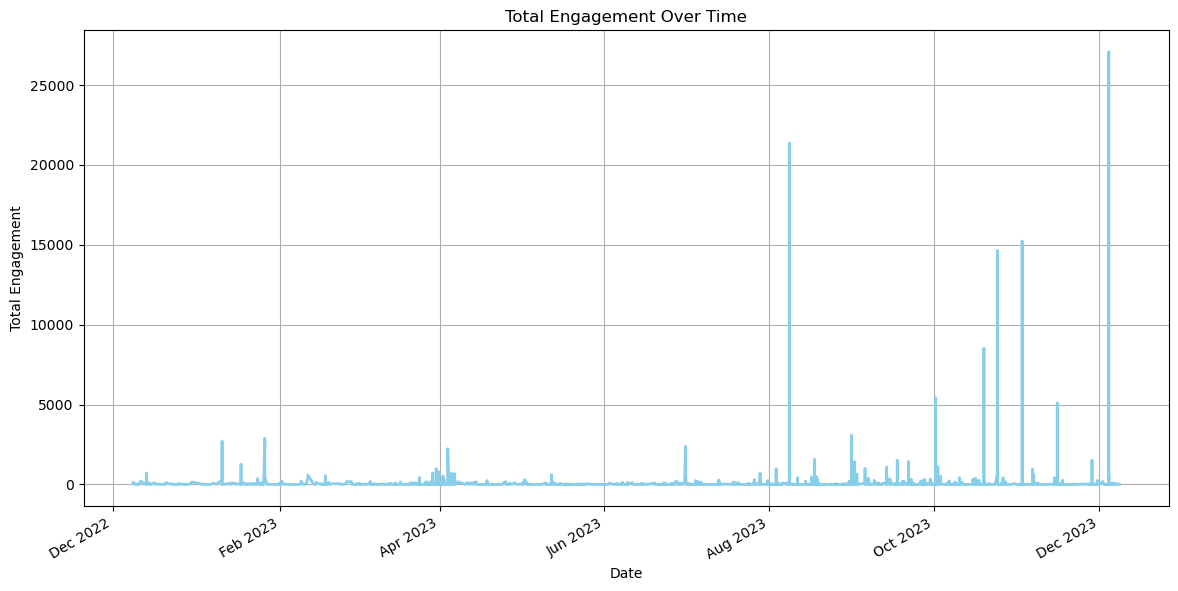

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Total Engagement Over Time
plt.figure(figsize=(14, 7))
plt.plot(post_performance_data['Date'], post_performance_data['Engagements'], marker='', color='skyblue', linewidth=2)

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# Rotating the date labels
plt.gcf().autofmt_xdate()

plt.title('Total Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.grid(True)
plt.show()
plt.savefig('/Users/Owner/Downloads/total_engagement_over_time.png', dpi=300, bbox_inches='tight')



In [41]:
post_performance_clean['Date'] = pd.to_datetime(post_performance_clean['Date'])
post_performance_clean['Day'] = post_performance_clean['Date'].dt.day_name()
post_performance_clean['Hour'] = post_performance_clean['Date'].dt.hour

In [42]:
day_hour_engagements = post_performance_clean.groupby(['Day', 'Hour'])['Engagements'].sum().unstack()


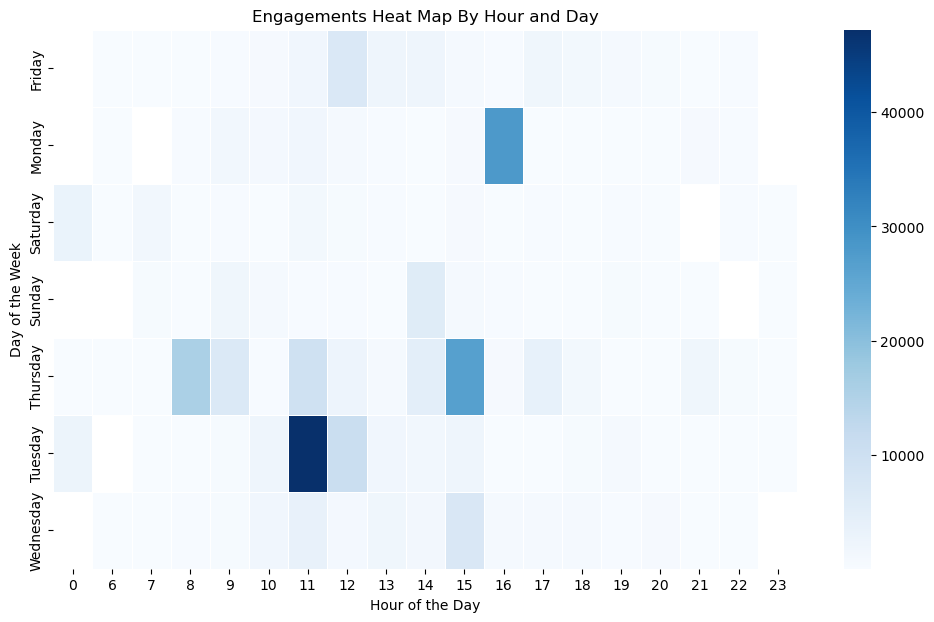

In [52]:
# Heatmap of Engagements by Hour and Day of the Week
plt.figure(figsize=(12, 7))
sns.heatmap(day_hour_engagements, cmap='Blues', linewidths=.5)
plt.title('Engagements Heat Map By Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.savefig('/Users/Owner/Downloads/new_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [45]:
plt.savefig('engagements_heatmap.png')


<Figure size 640x480 with 0 Axes>

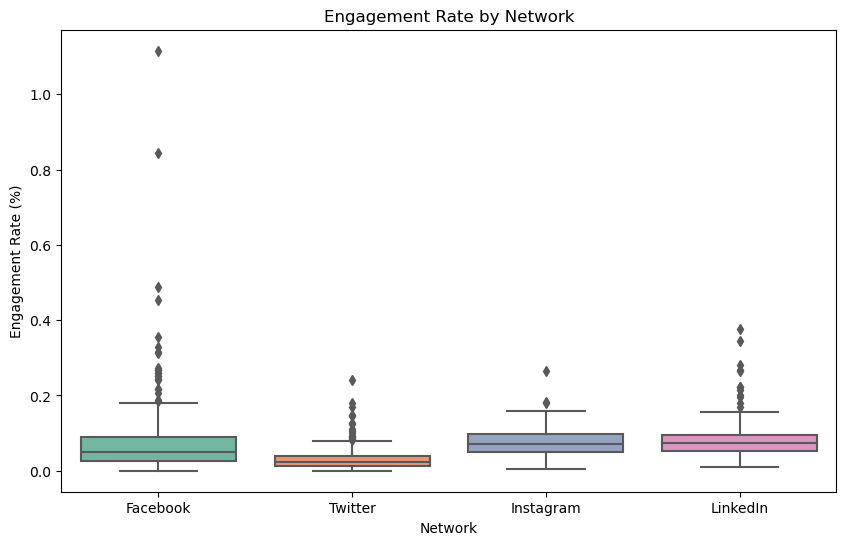

In [50]:
post_performance_clean['EngagementRate'] = post_performance_clean['Engagements'] / post_performance_clean['Impressions']

# Plot Engagement Rate by Network as a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=post_performance_clean, x='Network', y='EngagementRate', palette="Set2")
plt.title('Engagement Rate by Network')
plt.xlabel('Network')
plt.ylabel('Engagement Rate (%)')
plt.savefig('/Users/Owner/Downloads/engagement_rate_network.png')

# Show the plot
plt.show()